In [172]:
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

Task 1

Предобработка

In [173]:
xls = pd.ExcelFile('partner_in_analysis_tableau.xlsx')
data  = pd.read_excel(xls, 'data')

In [197]:
data

ResearchDate RespondentID               Start                Stop  \
0        2021-02-06  resp0478878 2021-02-06 20:20:00 2021-02-06 20:20:00   
1        2021-02-06  resp0478878 2021-02-06 15:45:00 2021-02-06 17:08:00   
2        2021-02-06  resp0478878 2021-02-06 10:07:00 2021-02-06 11:57:00   
3        2021-02-06  resp0478878 2021-02-06 21:05:00 2021-02-06 21:06:00   
4        2021-02-06  resp0478878 2021-02-06 18:09:00 2021-02-06 18:38:00   
...             ...          ...                 ...                 ...   
150292   2021-02-14  resp8404155 2021-02-14 14:34:00 2021-02-14 14:36:00   
150293   2021-02-14  resp8404155 2021-02-14 14:38:00 2021-02-14 14:40:00   
150294   2021-02-14  resp8404155 2021-02-14 14:42:00 2021-02-14 14:42:00   
150295   2021-02-14  resp8404155 2021-02-14 14:45:00 2021-02-14 14:47:00   
150296   2021-02-14  resp8404155 2021-02-14 12:49:00 2021-02-14 12:54:00   

        Duration  PackageID  Weight           Title  
0             60       2004   6.590   Мужчины 45-54  
1           5040       2039   6.590   Мужчины 45-54  
2           6660       2075   6.590   Мужчины 45-54  
3            120       2075   6.590   Мужчины 45-54  
4           1800       2086   6.590   Мужчины 45-54  
...          ...        ...     ...             ...  
150292       180       2105   8.812  Мужчины 18-24   
150293       180       2105   8.812  Мужчины 18-24   
150294        60       2105   8.812  Мужчины 18-24   
150295       180       2105   8.812  Мужчины 18-24   
150296       360       2044   8.812  Мужчины 18-24   

[150297 rows x 8 columns]

In [175]:
data.dtypes

ResearchDate    datetime64[ns]
RespondentID            object
Start           datetime64[ns]
Stop            datetime64[ns]
Duration                 int64
PackageID                int64
Weight                 float64
Title                   object
dtype: object

In [176]:
data.isna().sum()#данные на месте

ResearchDate    0
RespondentID    0
Start           0
Stop            0
Duration        0
PackageID       0
Weight          0
Title           0
dtype: int64

In [177]:
#data = data.drop_duplicates() Похоже, что в данные закрались дубликаты. Лучше от них избавиться

In [203]:
data.ResearchDate.sort_values() #Наблюдения длились примерно 9 дней

0        2021-02-06
15657    2021-02-06
15656    2021-02-06
15655    2021-02-06
15654    2021-02-06
            ...    
82287    2021-02-14
82286    2021-02-14
82285    2021-02-14
82299    2021-02-14
150296   2021-02-14
Name: ResearchDate, Length: 150297, dtype: datetime64[ns]

Стобец PackageID очень напоминает канал или пакет каналов.
Столбец Weight пока не совсем понятен. Присмотримся.

Стало понятно, что каждый респондент принадлежит к одной из возрастных групп.

In [183]:
groupped_title = data.groupby('Title').agg({'RespondentID' : 'nunique', 'Weight': 'mean'}).reset_index(drop=False) 

In [198]:
groupped_title

Title  RespondentID     Weight
0   Женщины 18-24             34  12.252122
1    Женщины 25-34           122   7.315219
2    Женщины 35-44           180   4.552326
3    Женщины 45-54           139   5.643771
4    Женщины 55-64           127   8.491756
5      Женщины 65+            81  14.340213
6   Мужчины 18-24             42   4.998002
7    Мужчины 25-34           131   5.569411
8    Мужчины 35-44           154   5.396259
9    Мужчины 45-54           113   7.035942
10   Мужчины 55-64           112   6.075011
11     Мужчины 65+            64  14.501908

Похоже, что Weight обратно коррелирует с количеством респондентов. И в то же время напоминает половозрастную структуру населения России. Возможно, это не единственные факторы, влияющие на подсчет Weight, однако, наиболее сильные.

In [188]:
groupped_resp = data.groupby('RespondentID').agg({'Title' : 'nunique', 'Weight' : 'nunique'}).reset_index(drop=False) 

In [205]:
groupped_resp

RespondentID  Title  Weight
0     resp0003126      1       8
1     resp0012641      1       7
2     resp0014405      1       9
3     resp0017570      1       9
4     resp0018372      1       9
...           ...    ...     ...
1294  resp9977253      1       1
1295  resp9977726      1       6
1296  resp9984057      1       4
1297  resp9990519      1       9
1298  resp9992678      1       6

[1299 rows x 3 columns]

In [204]:
groupped_resp.Weight.sort_values()

333     1
967     1
1058    1
1128    1
962     1
       ..
282     9
814     9
280     9
806     9
886     9
Name: Weight, Length: 1299, dtype: int64

У одного респондента встречается как 1, так и 9 весов. Исследование длилось 9 дней, что начинает наводить на мысль о том, что Weight мог меняться со временем даты. Получается, что это происходило из-за изменения структуры респондентов

In [216]:
data.groupby(['ResearchDate', 'RespondentID']).agg({'Weight' : 'nunique'})

Weight
ResearchDate RespondentID        
2021-02-06   resp0003126        1
             resp0014405        1
             resp0017570        1
             resp0018372        1
             resp0024920        1
...                           ...
2021-02-14   resp9953226        1
             resp9962387        1
             resp9965401        1
             resp9990519        1
             resp9992678        1

[8459 rows x 1 columns]

In [215]:
data.groupby(['ResearchDate', 'RespondentID']).agg({'Weight' : 'nunique'}).Weight.value_counts()

1    8459
Name: Weight, dtype: int64

Так и есть, при группировке по датам и респондентам, Weight начинает принимать только одно значение

In [219]:
data.query('ResearchDate == "2021-02-06"').groupby('RespondentID').agg({'Weight' : 'mean'})

Weight
RespondentID        
resp0003126    3.583
resp0014405    3.961
resp0017570    3.001
resp0018372    4.352
resp0024920    1.792
...              ...
resp9962387   14.166
resp9965401    5.039
resp9977726    6.305
resp9984057    3.204
resp9990519    6.271

[936 rows x 1 columns]

Проверим, действительно ли перевзвешивание происходило из-за изменения структуры.

In [232]:
data.query('ResearchDate == "2021-02-06"').groupby('Title').agg({'RespondentID' : 'nunique', 'Weight': 'mean'}).reset_index(drop=False)

Title  RespondentID     Weight
0   Женщины 18-24             13   7.315219
1    Женщины 25-34            76   7.047911
2    Женщины 35-44           136   4.625836
3    Женщины 45-54            96   5.084938
4    Женщины 55-64           109   8.264667
5      Женщины 65+            69  15.218556
6   Мужчины 18-24             23   5.015003
7    Мужчины 25-34            84   6.234563
8    Мужчины 35-44           105   4.810387
9    Мужчины 45-54            81   6.388839
10   Мужчины 55-64            93   6.245974
11     Мужчины 65+            51  12.595204

In [233]:
data.query('ResearchDate == "2021-02-07"').groupby('Title').agg({'RespondentID' : 'nunique', 'Weight': 'mean'}).reset_index(drop=False)

Title  RespondentID     Weight
0   Женщины 18-24             19  10.484233
1    Женщины 25-34            92   7.767378
2    Женщины 35-44           130   4.710659
3    Женщины 45-54           104   5.731023
4    Женщины 55-64           111   8.420270
5      Женщины 65+            70  14.252034
6   Мужчины 18-24             22   7.136194
7    Мужчины 25-34            81   4.455735
8    Мужчины 35-44           114   5.132045
9    Мужчины 45-54            85   6.285211
10   Мужчины 55-64            91   5.963222
11     Мужчины 65+            52  11.939334

В целом, тенденция пересчёта Weight из-за изменения структуры наблюдается, но есть исключения. Скорее всего, на них повлияли доп. факторы, не указанные в таблице.

В дальнейшем, для выявления взаимосвязей лучше брать усреднённый weight по группам

Теперь займёмся поиском взаимосвязей

In [238]:
data.groupby('Title').agg({'Duration' : 'mean'}).sort_values('Duration')
# Меньше всего смотрят молодые парни и девушки, дольше - Женщины 45-54, 55-64, 65+

Duration
Title                      
Женщины 18-24    604.715640
Мужчины 18-24    730.507328
Женщины 25-34    813.555664
Мужчины 25-34    868.980343
Мужчины 45-54    877.453145
Мужчины 65+      877.895275
Женщины 35-44    879.548768
Мужчины 55-64    936.451258
Мужчины 35-44    970.658949
Женщины 45-54   1029.239803
Женщины 55-64   1148.896247
Женщины 65+     1203.057238

In [241]:
data[['Title', 'PackageID']].groupby('Title').agg(lambda x: x.value_counts().index[0]) 
# Посмотрим самые популярны каналы в группах.2085 - самый популярный, встретился 7 раз, на втором месте 2077 - 3 раза.

PackageID
Title                    
Женщины 18-24        2085
Женщины 25-34        2077
Женщины 35-44        2077
Женщины 45-54        2077
Женщины 55-64        2085
Женщины 65+          2085
Мужчины 18-24        2081
Мужчины 25-34        2085
Мужчины 35-44        2091
Мужчины 45-54        2085
Мужчины 55-64        2085
Мужчины 65+          2085

In [242]:
data[['ResearchDate', 'PackageID']].groupby('ResearchDate').agg((lambda x: x.value_counts().index[0])) 
#Теперь посмотрим самый популярный канал по дням. 2085 встретился 7 раз, 2076 и 2077 по одному. 
#Возможна связь с днями недели, которую надо проверить, потому что в 1 воскресенье самый популярный 2076, во 2 - 2085

PackageID
ResearchDate           
2021-02-06         2085
2021-02-07         2076
2021-02-08         2085
2021-02-09         2085
2021-02-10         2085
2021-02-11         2085
2021-02-12         2077
2021-02-13         2085
2021-02-14         2085

In [263]:
data.sort_values(by = 'Duration', ascending=False).head(1) 
#Хоть и его релевантность под вопросом, но самый длинный просмотр длился примерно 14 часов и принадлежал Женщине 55-64

ResearchDate RespondentID               Start                Stop  \
130118   2021-02-07  resp4724688 2021-02-07 10:20:00 2021-02-08 00:23:00   

        Duration  PackageID  Weight          Title  
130118     50640       2064   2.358  Женщины 55-64

# Вывод по первому заданию:

1. Исследование длилось 9 дней. Пропавших данных нет. Каждый респондент был закреплён за одной из половозрастных групп.

2. Weight положительно коррелирует с половозрастным составом населения и отрицательно с количеством RespondentId. Также она связана с ещё некоторыми неизвестными (скорее всего, они обладают меньшим влиянием). В некоторых группах менялась каждый день.

3. В среднем меньше всего смотрят телевизор молодые парни и девушки, дольше всех смотрят - Женщины 45-54, 55-64, 65+.

4. В разбивке по половозрастным группам наиболее популярный канал 2085 встретился 7 раз, на втором месте 2077 - 3 раза. 2081 и 2091 встретились по 1 разу.

5. Рассматривая самые популярные каналы по дню недели, 2085 встретился 7 раз, 2076 и 2077 по одному. Возможна связь с днями недели, которую надо проверить, потому что в 1 воскресенье самый популярный 2076, во 2 - 2085, возможно было особенное событие.

6. Хоть и его релевантность под вопросом, но самый длинный просмотр длился примерно 14 часов и принадлежал респонденту из группы Женщины 55-64.

# Task 2.

In [83]:
hours = data[['Start', 'Stop']]

In [266]:
pd.options.mode.chained_assignment = None #Создадим стобец, где соберём часовые интервалы каждого индекса
data['intervals'] = data[['Start', 'Stop']].apply(lambda x: pd.date_range(x[0].strftime('%Y-%m-%d %H:00:00'),
                                                                          x[1].strftime('%Y-%m-%d %H:00:00'), freq='H'), 
                                                                          axis=1)

Text(0, 0.5, 'Количество пользователей')

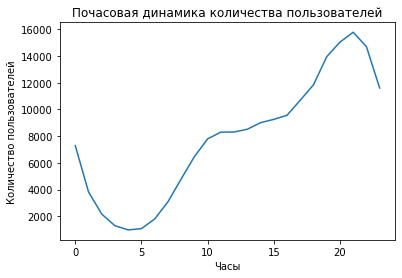

In [267]:
data.intervals.explode().dt.hour.value_counts().sort_index(ascending = True)\
    .plot()\
    .set_title('Почасовая динамика количества пользователей')
plt.xlabel("Часы")
plt.ylabel("Количество пользователей")

На графике явно заметны просадки в просмотрах примерно с 2 до 6 часов ночи, а также пик в районе 21 часа вечера